In [ ]:
!pip install pystan~=2.14
!python -m pip install prophet



In [ ]:
# @title #Прогнозирование индекса потребительских цен Республики Тыва

import prophet

In [ ]:
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
os.getcwd()

'/content'

In [ ]:
df = pd.read_excel("gdrive/MyDrive/ips3.xlsx") # Загрузили данные ИПЦ с января 2002 г. по октябрь 2022 г
df.tail(10)

,Дата,ИПЦ
240,2022-01-01,108.14
241,2022-02-01,108.56
242,2022-03-01,114.97
243,2022-04-01,115.05
244,2022-05-01,113.81
245,2022-06-01,112.68
246,2022-07-01,112.37
247,2022-08-01,111.75
248,2022-09-01,111.08
249,2022-10-01,110.58


<Axes: >

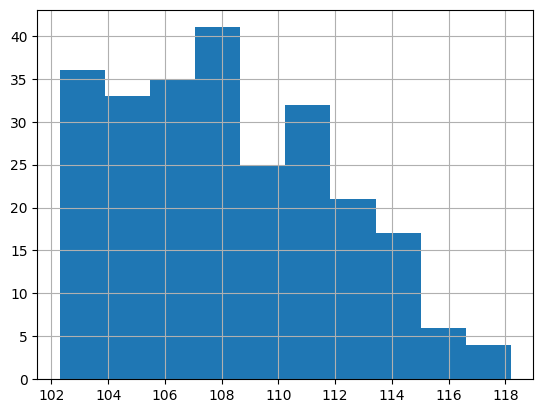

In [ ]:
df['ИПЦ'].hist()

In [ ]:
df1 = df.rename({'Дата':'ds','ИПЦ':'y'}, axis = 1)

In [ ]:
adfuller(df1.y) # Проверили на стационарность ряда, хотя выше по гистограмме видно что он нестационарен
                # p - уровень больше 0.05(0.2) нулевая гипотеза о нестационарности ряда не отвергается

(-2.215366170748736,
 0.2007157672760031,
 13,
 236,
 {'1%': -3.4583663275730476,
  '5%': -2.8738660999177132,
  '10%': -2.5733390785693766},
 496.9726143774615)

In [ ]:
df1['ds']

0     2002-01-01
1     2002-02-01
2     2002-03-01
3     2002-04-01
4     2002-05-01
         ...    
245   2022-06-01
246   2022-07-01
247   2022-08-01
248   2022-09-01
249   2022-10-01
Name: ds, Length: 250, dtype: datetime64[ns]

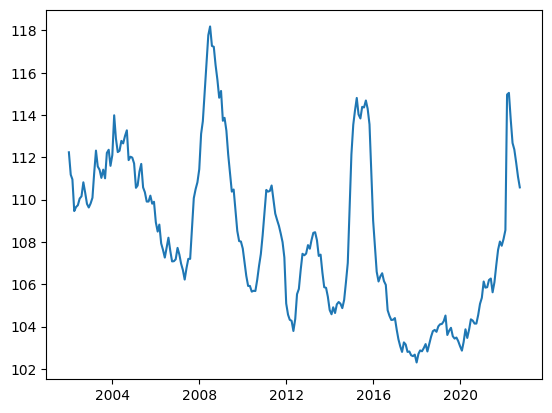

In [ ]:
from matplotlib import figure


plt.plot(df1['ds'], df1['y'])

In [ ]:
model = prophet.Prophet(yearly_seasonality = True,  daily_seasonality = False, weekly_seasonality = False, seasonality_mode = 'additive')
model.fit(df1)

DEBUG:cmdstanpy:input tempfile: /tmp/tmptfa4rl6o/ygn4thhf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptfa4rl6o/kw2mtuuy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17890', 'data', 'file=/tmp/tmptfa4rl6o/ygn4thhf.json', 'init=/tmp/tmptfa4rl6o/kw2mtuuy.json', 'output', 'file=/tmp/tmptfa4rl6o/prophet_model06uldhn9/prophet_model-20231004081629.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = model.make_future_dataframe(periods = 3, freq = 'y')
forecast = model.predict(future);

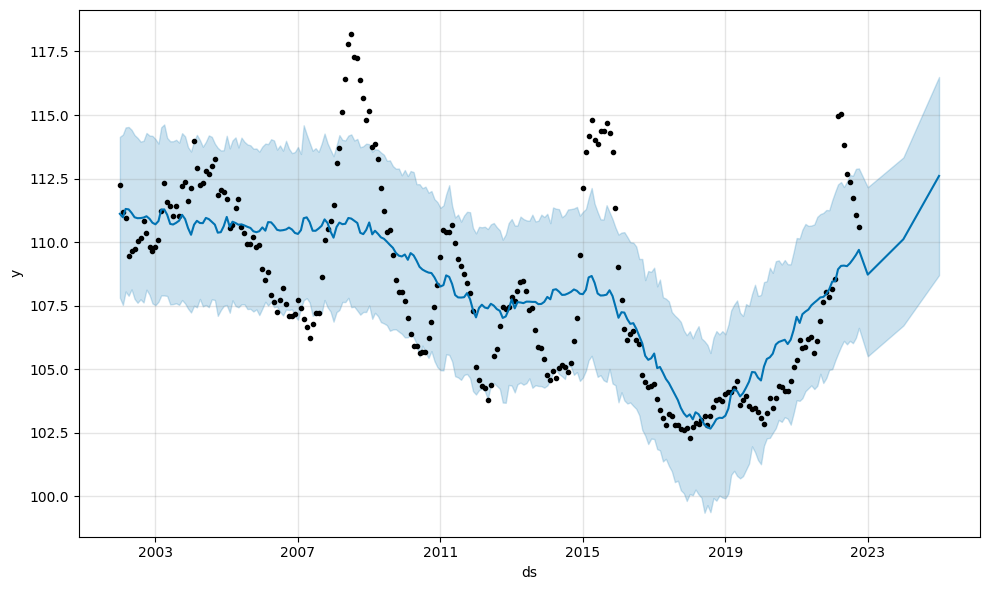

In [ ]:
model.plot(forecast);


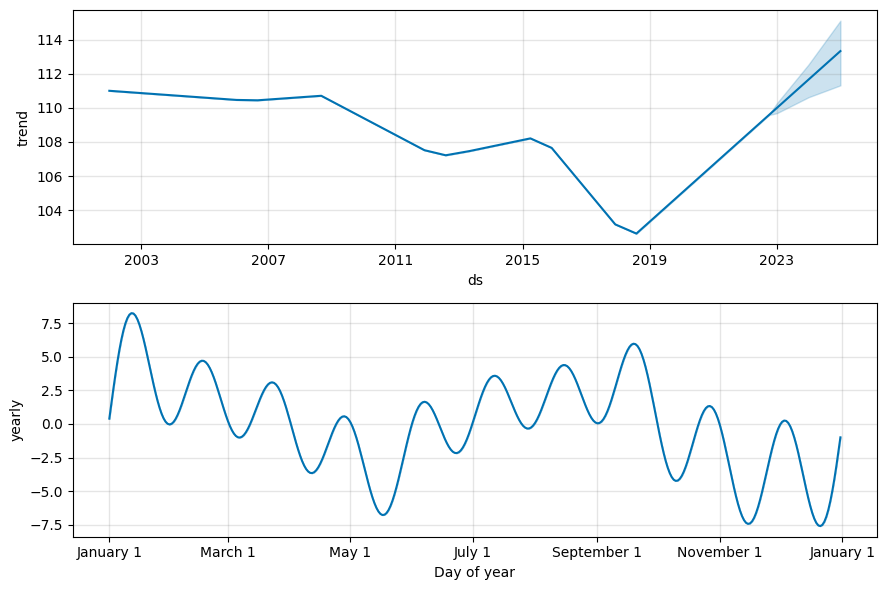

In [ ]:
fig2 = model.plot_components(forecast)

In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']].tail(5)
# Спрогнозированные данные в столбце - yhat, начиная с 250 строки

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
248,2022-09-01,109.494938,106.235089,112.882650,109.438505,109.438505,109.438505
249,2022-10-01,109.693850,106.623911,112.899466,109.575290,109.575290,109.575290
250,2022-12-31,108.719262,105.505531,112.158620,109.990203,109.683495,110.263211
251,2023-12-31,110.111080,106.713883,113.329954,111.654416,110.619855,112.541320
252,2024-12-31,112.602790,108.696166,116.498066,113.323189,111.315698,115.105250
